# Rental Bikes Potential Customers Prediction
###### Data Source Link: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
## Group 8 
#### Members:
- Saloni Bhutada
- Aman Maheshwari

## Problem Description

The data gathered is generated by **Capital bikeshare system** based out of **Washington, DC** with the corresponding weather and seasonal information. This information may be utilized to get insights on urban mobility patterns, travel behavior, transit demand and the impact of weather thus to improve bike sharing systems and to influence transportation planning and policy decisions.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Data Description:
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
bike_rental = pd.read_csv("hour.csv")
bike_rental.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

In [3]:
bike_rental.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bike_rental.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Unique values
bike_rental.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

### Renaming columns for better understanding

In [7]:
bike_rental = bike_rental.rename(columns={
                       'season': 'Season',
                       'holiday': 'Holiday',
                       'weekday': 'Weekday',
                       'workingday': 'Workingday',
                       'weathersit': 'Weather_Condition',
                       'temp': 'Temperature',
                       'atemp': 'Feels_Like_Temp',
                       'windspeed': 'Windspeed',                  
                       'mnth':'Month',
                       'hr':'Hour',
                       'yr':'Year',
                       'hum':'Humidity',
                       'casual':'Casual_Users',
                       'registered':'Registered_Users',                  
                       'cnt':'Total_Users'})
bike_rental.head()

,instant,dteday,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Feels_Like_Temp,Humidity,Windspeed,Casual_Users,Registered_Users,Total_Users
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Exploratory Data Analysis

##### 1) Let's find the overall description of our dataset

#### Casual Users Distribution

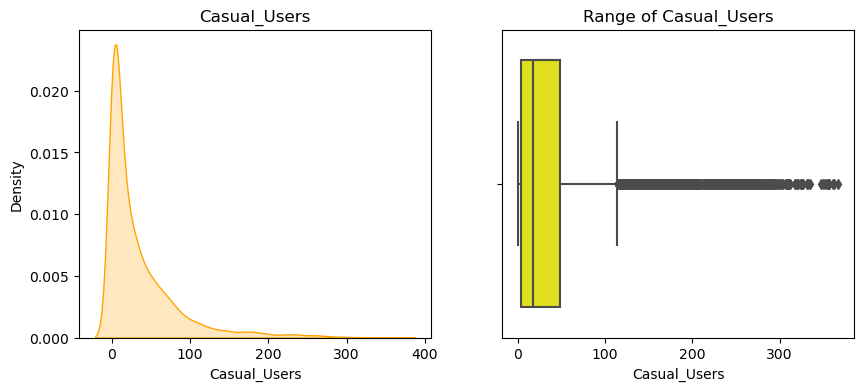

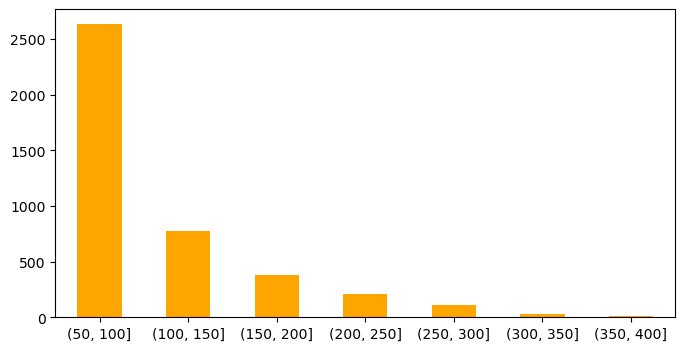

(50, 100]     2635
(100, 150]     778
(150, 200]     380
(200, 250]     211
(250, 300]     110
(300, 350]      26
(350, 400]       8
Name: Casual_Users, dtype: int64

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Casual_Users", color="orange",fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Casual_Users, color='yellow', ax=axes[1])

axes[0]. set_title('Casual_Users')
axes[1].set_title( 'Range of Casual_Users')
plt.show()
grp = pd.cut(bike_rental['Casual_Users'], bins=[50, 100, 150, 200, 250, 300, 350, 400],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(8,4))
plt.show()
print('')
grp.value_counts()

#### Registered Users Distribution

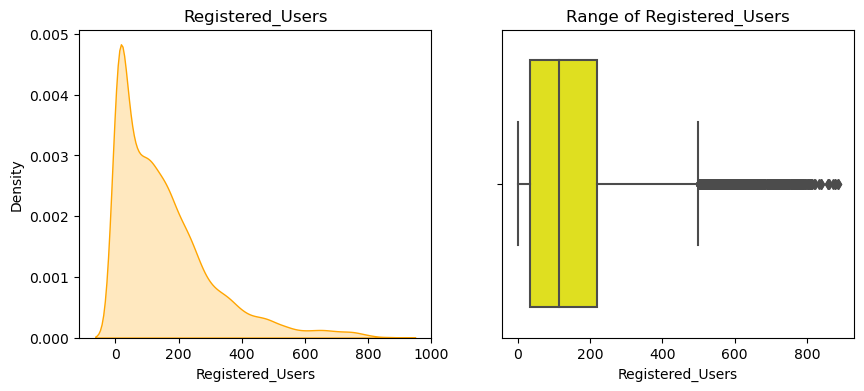

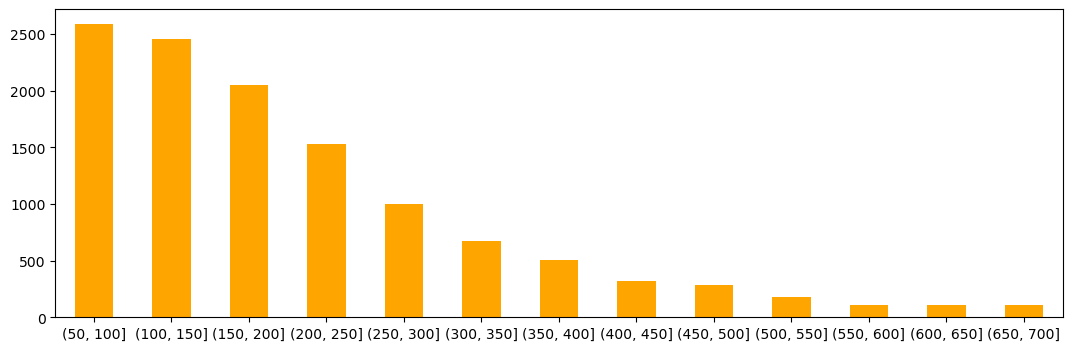

(50, 100]     2590
(100, 150]    2461
(150, 200]    2052
(200, 250]    1530
(250, 300]    1001
(300, 350]     670
(350, 400]     506
(400, 450]     319
(450, 500]     281
(500, 550]     182
(550, 600]     112
(650, 700]     106
(600, 650]     105
Name: Registered_Users, dtype: int64

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Registered_Users", color='orange',fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Registered_Users, color='yellow', ax=axes[1])

axes[0]. set_title('Registered_Users')
axes[1].set_title( 'Range of Registered_Users')
plt.show()
grp = pd.cut(bike_rental['Registered_Users'], bins=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(13,4))
plt.show()
print('')
grp.value_counts()

#### Total Users Distribution

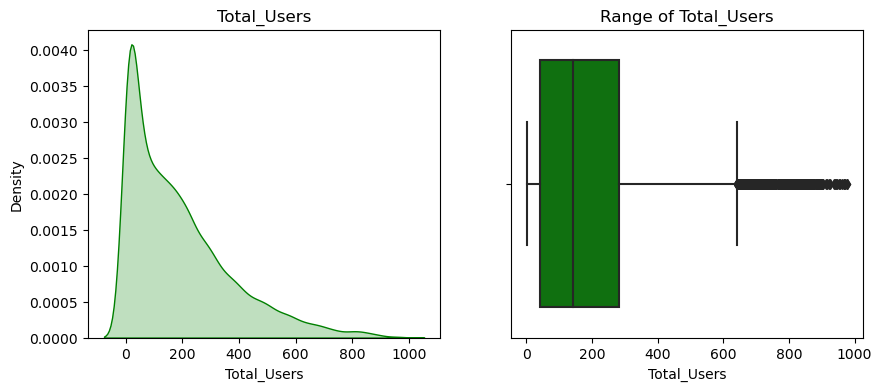

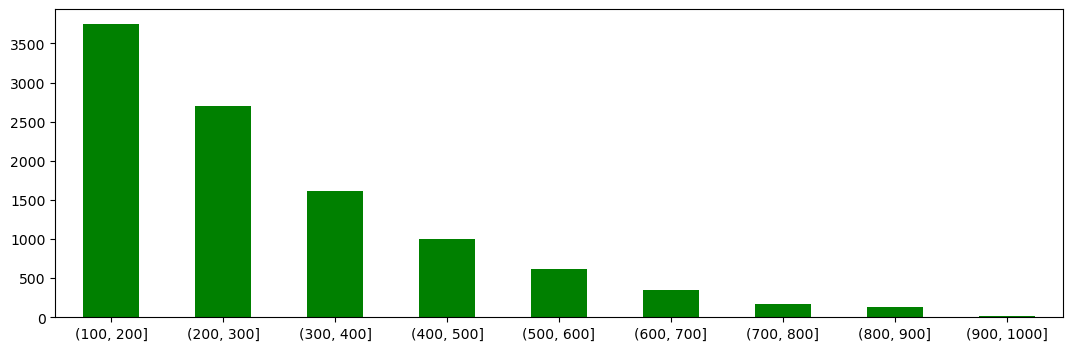

(100, 200]     3749
(200, 300]     2704
(300, 400]     1611
(400, 500]     1001
(500, 600]      614
(600, 700]      345
(700, 800]      173
(800, 900]      129
(900, 1000]      18
Name: Total_Users, dtype: int64

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.kdeplot(data=bike_rental, x="Total_Users", color='green',fill=True, ax=axes[0])
sns.boxplot (x=bike_rental.Total_Users, color='green', ax=axes[1])

axes[0]. set_title('Total_Users')
axes[1].set_title( 'Range of Total_Users')
plt.show()
grp = pd.cut(bike_rental['Total_Users'], bins=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],include_lowest=False)
ax = grp.value_counts(sort=False).plot.bar(rot=0, color="green", figsize=(13,4))
plt.show()
print('')
grp.value_counts()

#### a) Yearly Distribution (0: 2011, 1:2012)

[Text(0.5, 1.0, 'Yearly Comparison of Total Bike Rental Users')]

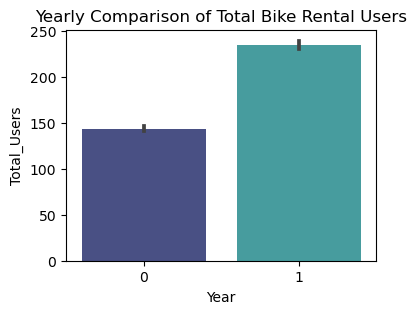

In [11]:
firstyear_userscount = bike_rental[bike_rental.Year == 0].count()['Total_Users']
secondyear_userscount= bike_rental[bike_rental.Year == 1].count()['Total_Users']
firstyear_userscount_ratio = (firstyear_userscount/ (bike_rental.shape[0]))*100
secondyear_userscount_ratio = (secondyear_userscount/bike_rental.shape[0])*100

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(data=bike_rental, x='Year', y='Total_Users', ax=ax, palette = "mako")
ax.set(title='Yearly Comparison of Total Bike Rental Users')

#### b) Monthly Distribution 

[Text(0.5, 1.0, 'Total users of the rental bikes during different months')]

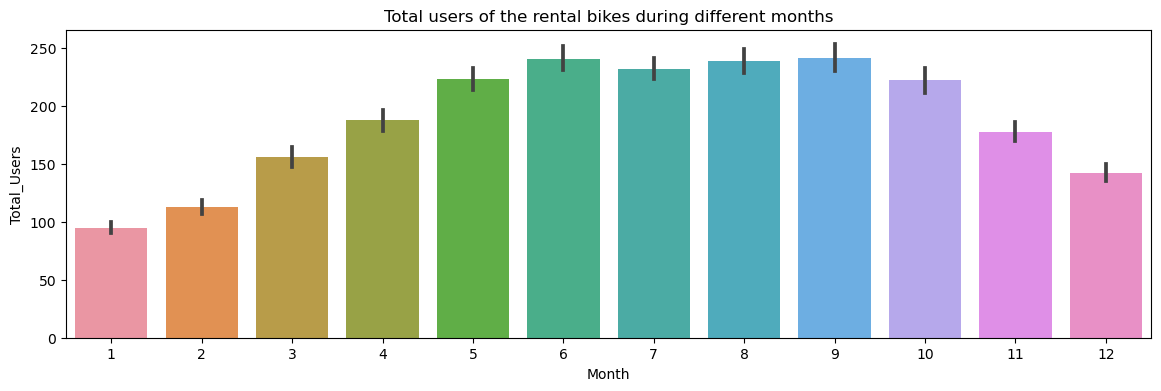

In [12]:
fig, ax = plt.subplots(figsize=(14,4))
sns.barplot(data=bike_rental, x='Month', y='Total_Users', ax=ax)
ax.set(title='Total users of the rental bikes during different months')

#### Working Daywise monthly users count split

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Total_Users'>

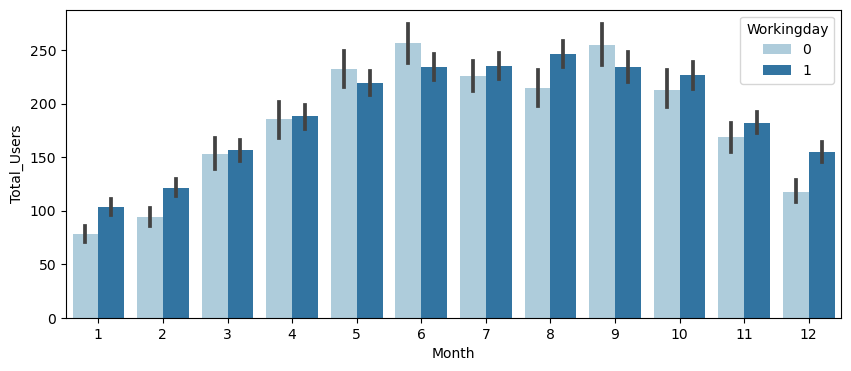

In [13]:
plt.figure(figsize=(10,4))
sns.barplot('Month','Total_Users',hue='Workingday',data=bike_rental, palette='Paired')
# sns.countplot(data=bike_rental ,x='Month',hue='Holiday',palette='Blues')
# plt.show()

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Total_Users'>

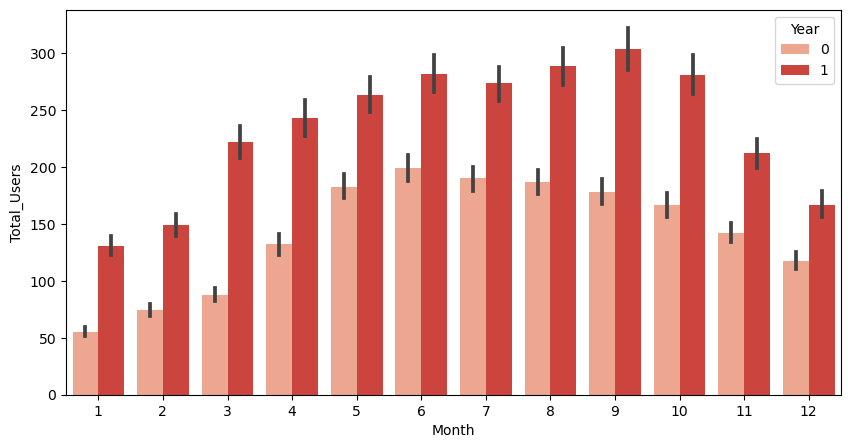

In [14]:
plt.figure(figsize=(10,5))
sns.barplot('Month','Total_Users',hue='Year',data=bike_rental,palette='Reds')

#### d) Weekly Distribution:
- 0:Mon
- 1:Tue
- 2:Wed
- 3:Thu
- 4:Fri
- 5:Sat
- 6:Sun

[Text(0.5, 1.0, 'Total users of the rental bikes during weekdays')]

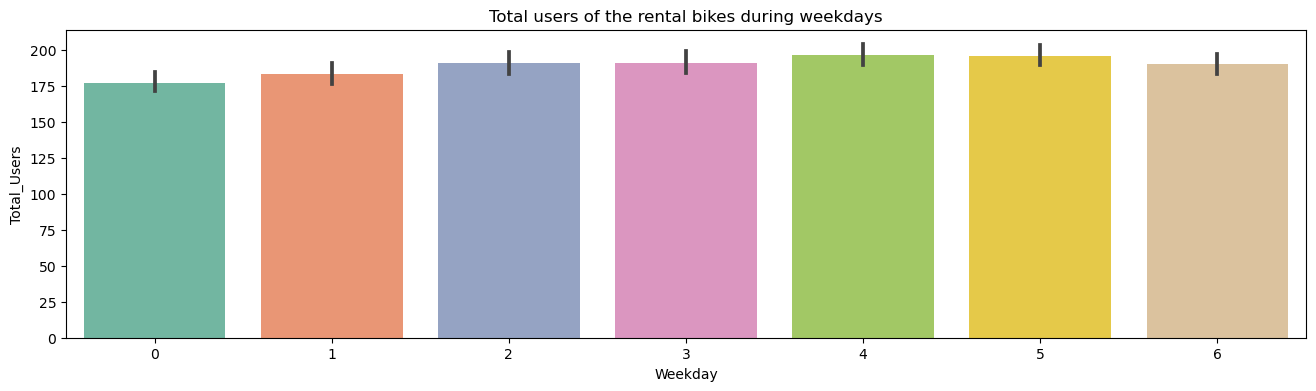

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(data=bike_rental, x='Weekday', y='Total_Users', ax=ax, palette = "Set2")
ax.set(title='Total users of the rental bikes during weekdays')

#### e) Hourly Distribution:
- Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service on Weekdays

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered Users')]

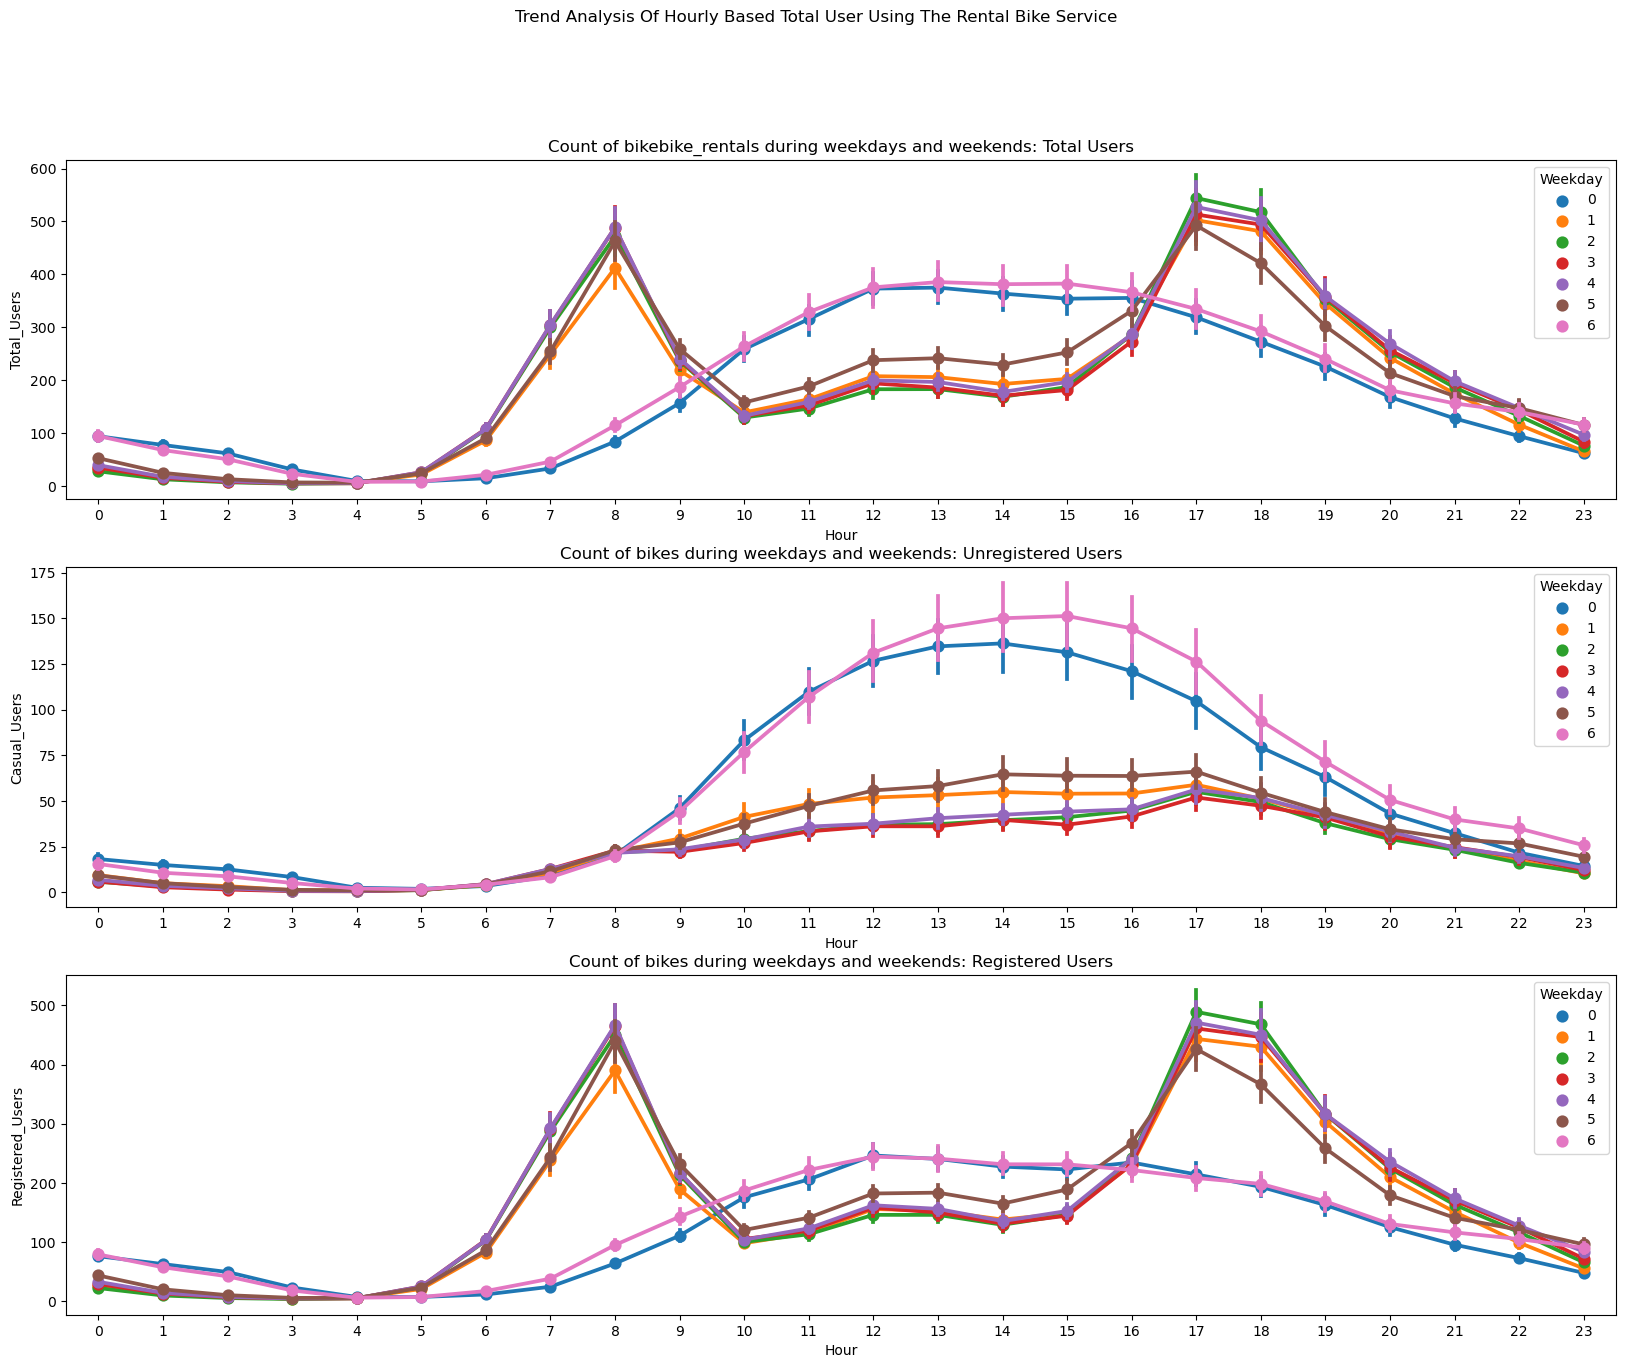

In [16]:
#Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service

f, axes=plt.subplots(3,figsize=(20,15),facecolor='white')
f.suptitle('Trend Analysis Of Hourly Based Total User Using The Rental Bike Service')
ax1 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Weekday', ax=axes[0])
ax2 = sns.pointplot(data=bike_rental, x='Hour', y='Casual_Users', hue='Weekday', ax=axes[1])
ax3 = sns.pointplot(data=bike_rental, x='Hour', y='Registered_Users', hue='Weekday', ax=axes[2])

ax1.set(title='Count of bikebike_rentals during weekdays and weekends: Total Users')
ax2.set(title='Count of bikes during weekdays and weekends: Unregistered Users')
ax3.set(title='Count of bikes during weekdays and weekends: Registered Users')

#### c) Seasonal Distribution : 
 - 1: Winter
 - 2: Spring 
 - 3: Summer
 - 4: Fall
 

[Text(0.5, 1.0, 'Total users of the rental bikes during weekdays')]

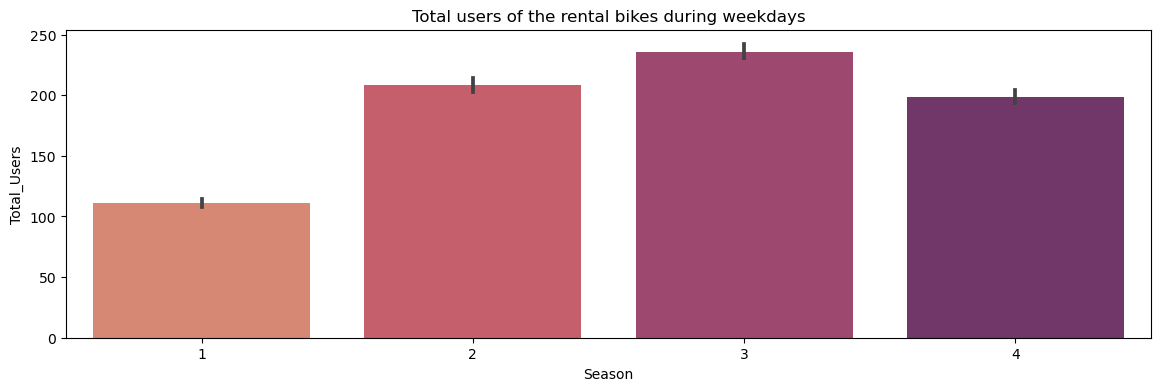

In [17]:
fig, ax = plt.subplots(figsize=(14,4))
# cols = ['grey' if (x < max(bike_rental['Total_Users'])) else 'orange' for x in bike_rental['Total_Users']]
sns.barplot(data=bike_rental, x='Season', y='Total_Users', ax=ax, palette = "flare")
ax.set(title='Total users of the rental bikes during weekdays')

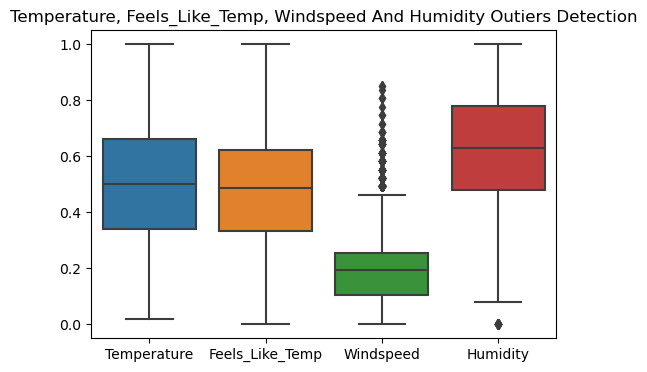

In [18]:
fig,ax=plt.subplots(figsize=(6,4))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_rental[['Temperature','Feels_Like_Temp','Windspeed','Humidity']])
ax.set_title('Temperature, Feels_Like_Temp, Windspeed And Humidity Outiers Detection')
plt.show()

From the above box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

#### Treating the windspeed and humidity variable's outlier

In [19]:
#Create dataframe for outliers
wind_hum=pd.DataFrame(bike_rental,columns=['Windspeed','Humidity'])

#Cnames for outliers                     
cnames=['Windspeed','Humidity']       
                      
for i in cnames:
    q75,q25 = np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr = q75-q25 #Inter quantile range
    min = q25-(iqr*1.5) #inner fence
    max = q75+(iqr*1.5) #outer fence
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan  #Replace with NA
#Imputating the outliers by mean Imputation
wind_hum['Windspeed']=wind_hum['Windspeed'].fillna(wind_hum['Windspeed'].mean())
wind_hum['Humidity']=wind_hum['Humidity'].fillna(wind_hum['Humidity'].mean())

In [20]:
#Replacing the imputated windspeed
bike_rental['Windspeed']=bike_rental['Windspeed'].replace(wind_hum['Windspeed'])
#Replacing the imputated humidity
bike_rental['Humidity']=bike_rental['Humidity'].replace(wind_hum['Humidity'])

### Weather Conditions:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

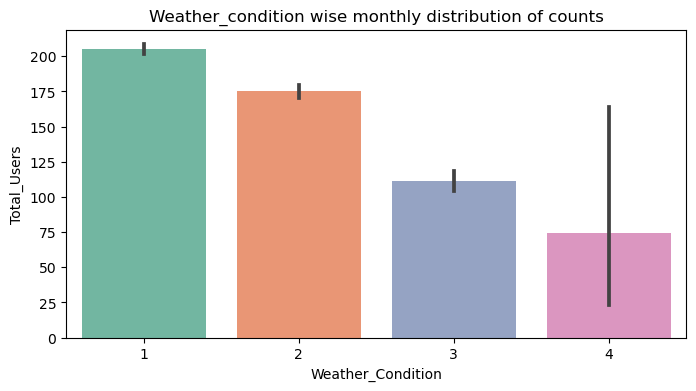

In [21]:
fig,ax1=plt.subplots(figsize=(8,4))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='Weather_Condition',y='Total_Users',data=bike_rental[['Month','Total_Users','Weather_Condition']],ax=ax1, palette = "Set2")
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

#### Trend Analysis Of Seasonality and Holiday's Hourly Based Total Users Using The Rental Bike Service 

[Text(0.5, 1.0, 'Total Users Of Bike_Rentals Based On The Holiday vs Non-Holiday')]

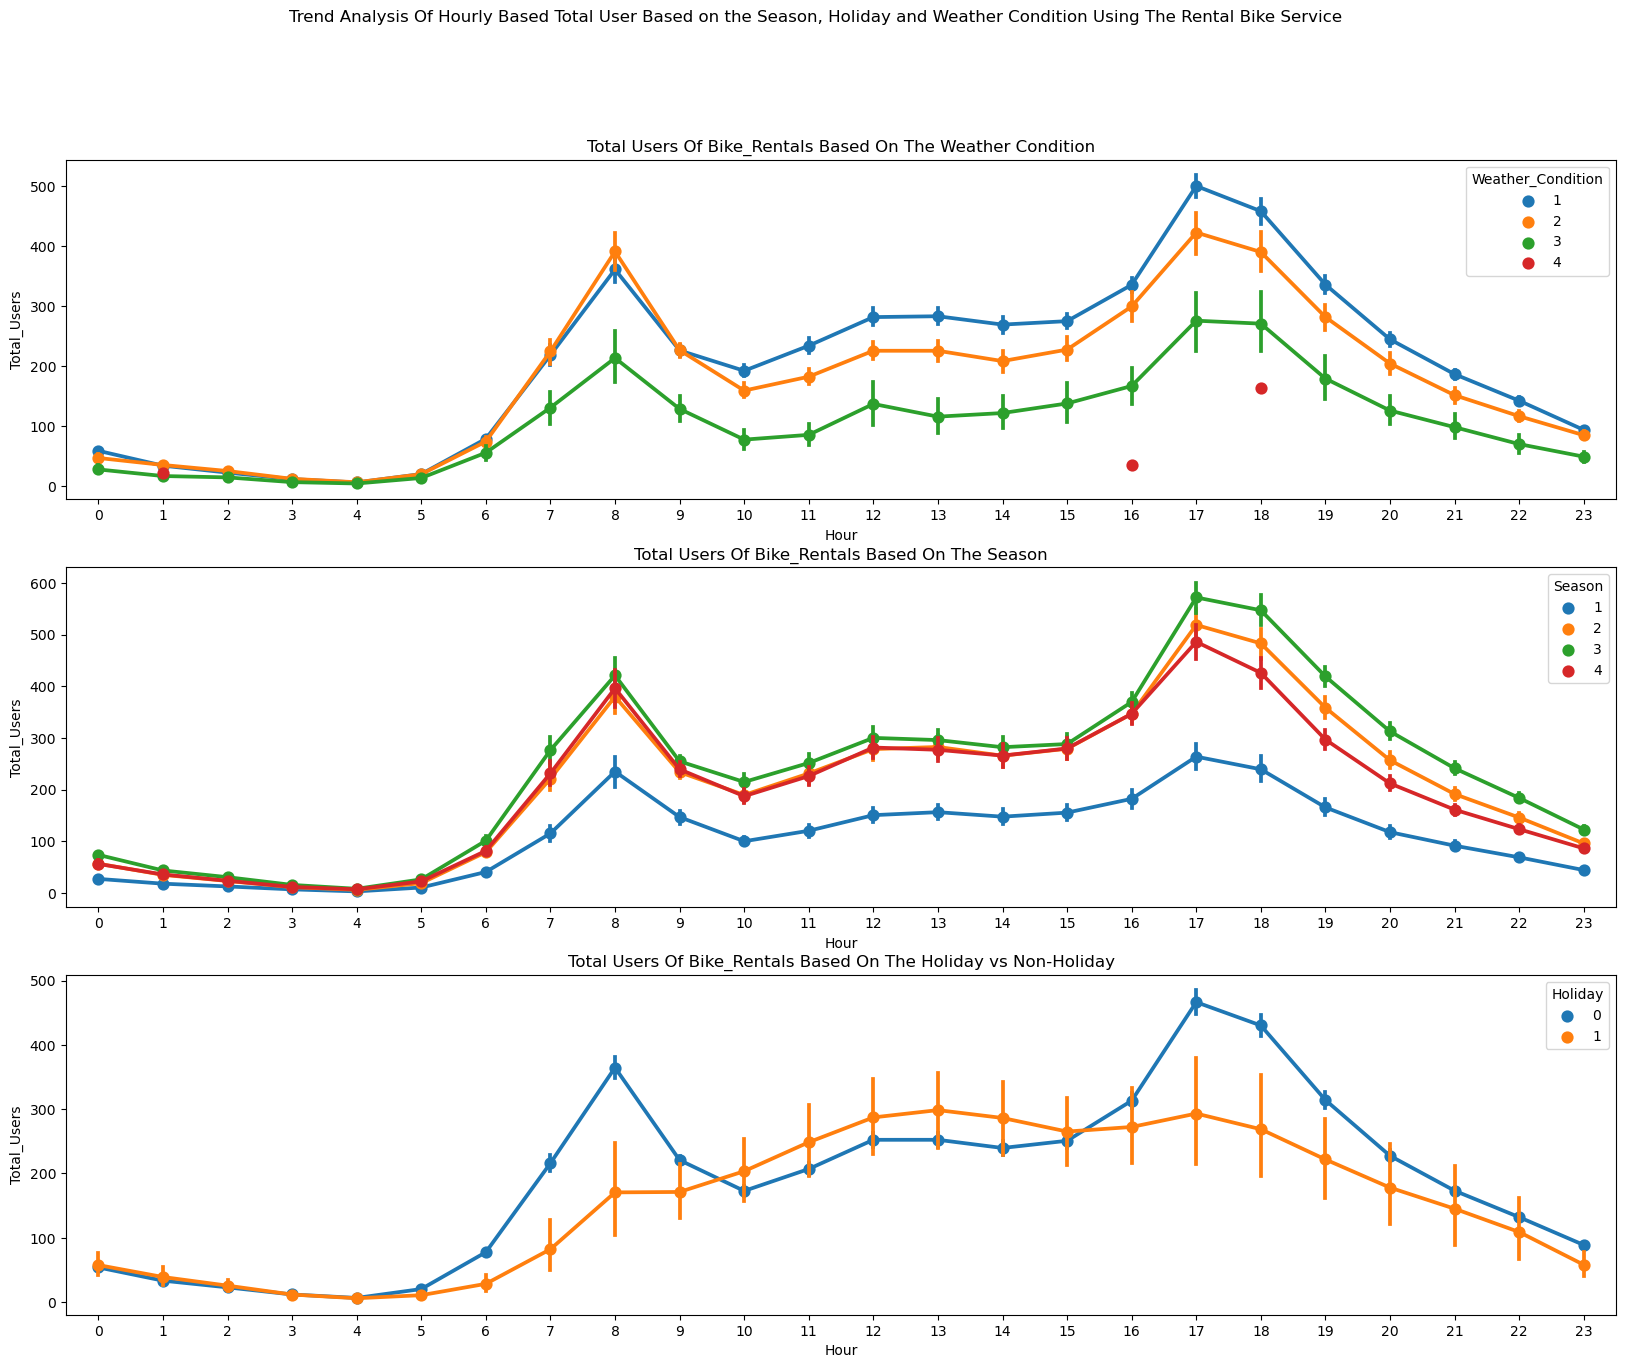

In [22]:
#Trend Analysis Of Hourly Based Total Users Using The Rental Bike Service

f, axes=plt.subplots(3,figsize=(20,15),facecolor='white')
f.suptitle('Trend Analysis Of Hourly Based Total User Based on the Season, Holiday and Weather Condition Using The Rental Bike Service')
ax1 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Weather_Condition', ax=axes[0])
ax2 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Season', ax=axes[1])
ax3 = sns.pointplot(data=bike_rental, x='Hour', y='Total_Users', hue='Holiday', ax=axes[2])

ax1.set(title='Total Users Of Bike_Rentals Based On The Weather Condition')
ax2.set(title='Total Users Of Bike_Rentals Based On The Season')
ax3.set(title='Total Users Of Bike_Rentals Based On The Holiday vs Non-Holiday')

#### Distribution Plot of Weather Conditions And Total Users

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

[Text(0.5, 1.0, 'Distriution Plot Based On The Total_Users')]

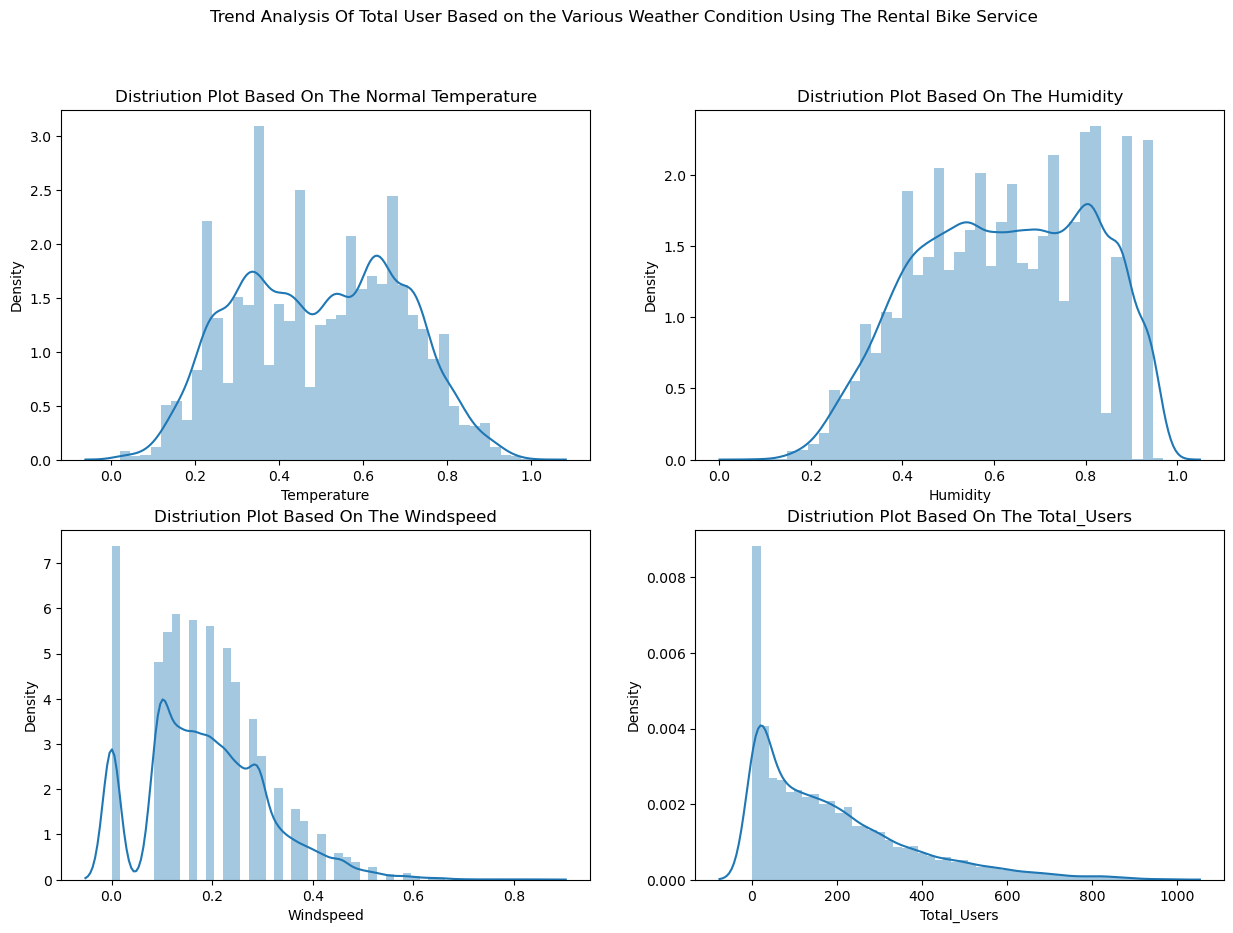

In [23]:
f, axes=plt.subplots(2,2,figsize=(15,10),facecolor='white')
f.suptitle('Trend Analysis Of Total User Based on the Various Weather Condition Using The Rental Bike Service')
ax1 = sns.distplot(bike_rental['Temperature'], ax = axes[0,0])
ax2 = sns.distplot(bike_rental['Humidity'], ax = axes[0,1])
ax3 = sns.distplot(bike_rental['Windspeed'], ax = axes[1,0])
ax4 = sns.distplot(bike_rental['Total_Users'], ax = axes[1,1])

ax1.set(title='Distriution Plot Based On The Normal Temperature')
ax2.set(title='Distriution Plot Based On The Humidity')
ax3.set(title='Distriution Plot Based On The Windspeed')
ax4.set(title='Distriution Plot Based On The Total_Users')


# Data Wrangling/ Feature Engineering

### Checking Correlation

<AxesSubplot:>

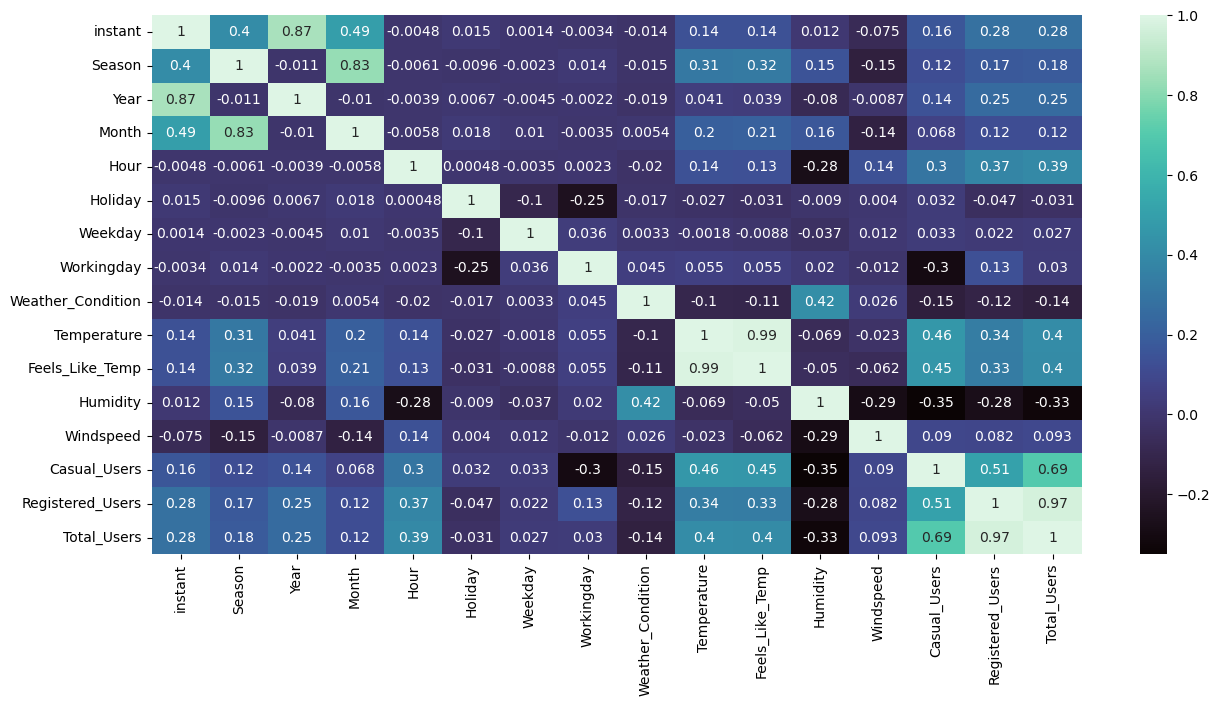

In [24]:
corr_matrix = bike_rental.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True, cmap = 'mako', annot_kws={'size':10})

We can see from the correlation plot that certain characteristics are favorably connected while others are negatively correlated. The Temperature and Feels_Like_Temp are significantly positively connected, indicating that they are carrying the same information. Total Users, Casual Users, and Registered Users are all substantially positively connected. As a result, we will disregard Feels_Like_Temp, Casual Users, and Registered Users variables in addition to instance.

### Dropping the highly collinear columns

In [25]:
bike_rental = bike_rental.drop(['instant','dteday','Feels_Like_Temp','Casual_Users','Registered_Users'], axis=1)

In [26]:
bike_rental.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


# Model Implementation

## Linear Regression

In [27]:
#Defining Class and the model functions
class LinearRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, l2lambda, gd = False, reg = False, sgd = False) -> None:
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.l2lambda = l2lambda
        self.gd = gd
        self.reg = reg
        self.sgd = sgd
    
    #Split the dataset to train and test subsets
    def trainTestSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)
        return X_train, X_test, y_train, y_test
    
    def add_X0(self,X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    #Training Data needs to be Normalized
    def normalize(self,X):
        self.mean = np.mean(X, 0)
        self.sd = np.std(X, 0)
        X_norm = (X - self.mean)/self.sd
        
        X_norm = self.add_X0(X_norm)
        return X_norm, self.mean, self.sd
    
    #Normalize test data
    def normalizeTestData(self, X, trainMean, trainSd):
        X_norm = (X - trainMean)/trainSd
        
        X_norm = self.add_X0(X_norm)
        return X_norm
    
    #Find Rank
    def rank(self, X, eps = 1e-12):
        u, s, vh = np.linalg.svd(X)
        return len([x for x in s if abs(x) > eps])
    
    #Matrix Rank
    def checkMatrix(self, X):
        X_rank = np.linalg.matrix_rank(X)
        
        if X_rank == np.minimum(X.shape[0], X.shape[1]):
            self.fullRank = True
            print("Data is full rank!")
        else:
            self.fullRank = False
            print("Data is not full rank!")
            
    # To check invertibility
    def checkInvertibility(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print("Data is low rank!")
        else:
            self.lowRank = False
            print("Data is not low rank!")
            
    # Closed Form Solution / Normal Equation
    def closebike_rentalormSolution(self, X, y):
        if(self.reg == False): # if reg = false, solve without regularization
            print("\n Solved without L2 Regularization")
            w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        else: #if reg = true, solve with regularization
            print("\n Solved with L2 Regularization")
            w = np.linalg.inv(X.T.dot(X) + self.l2lambda*(np.identity(X.shape[1]))).dot(X.T).dot(y)
        return w
    
    # Gradient Descent Function
    def gradientDescent(self, X, y): 
        self.temp = 0
        self.errorSequence = []
        last = float('inf')
        for t in tqdm(range(self.maxIteration)):
            if(self.reg == False):
                self.temp = 1
                self.updateWeightsWithoutL2Reg(X, y, self.errorSequence, last)
            else:
                self.temp = 0
                self.updateWeightsWithL2Reg(X, y, self.errorSequence, last)

            if self.lulz < self.tolerance:
                    print("No further improvement: Stop Further Iterations")
                    break
            if self.temp == 1:
                
                print("\n Solved without L2 Regularization")
            else:
                 print("\n Solved with L2 Regularization")
            return self
                
    def updateWeightsWithoutL2Reg(self, X, y, errorSequence, last): 
        self.w = self.w - self.learningRate * self.costDerivative(X, y)
        cur = self.sse(X, y)
        diff = last - cur
        self.lulz = diff
        last = cur
        self.errorSequence.append(cur)

    def updateWeightsWithL2Reg(self, X, y, errorSequence, last): 
        self.w = self.w - self.learningRate * self.costDerivative(X, y) + 2*(self.l2lambda*self.w)/X.shape[0]
        cur = self.sse(X, y)
        diff = last - cur
        self.lulz = diff
        last = cur
        errorSequence.append(cur)

    # Stochastic Gradient Descent Function
    def SGD(self, X, y, learningRate, maxIteration):
        self.w1 = np.random.randn(self.X.shape[1],1) #Randomly initialize weights
        self.b1 = np.random.randn(1,1)  #Randomly pick intercept call

        for iteration in range(1,maxIteration+1):
            sum_errors = 0 
            N = self.X.shape[0] 

            for i in range(N):
                batch_size = np.random.randint(0,N) 
                X_i = self.X[batch_size,:].reshape(1,self.X.shape[1])
                y_i = self.y[batch_size].reshape(1,1)
                y_hat1 = np.dot(X_i,self.w1) + self.b1                 
                loss = y_hat1 - y_i                                              
                sum_errors += loss**2                                   
                w_1 = X_i.T.dot((y_hat1 - y_i))
                b_1 = (y_hat1 - y_i)

                self.w1 = self.w1 -(2/N)*learningRate*(w_1)
                self.b1 = self.b1 - (2/N)*learningRate*(b_1)  

            print("Iteration: %d, Loss: %.3f" %(iteration, sum_errors/N))
        return self.w1, self.b1

    # Defining Sum of squares method
    def sse(self, X, y):
        self.y_hat = self.predict(X) #Predict y
        self.outputSse = ((self.y_hat - y)**2).sum()
        return self.outputSse
    
    # Predict should return X.THETA or THETA^T.(xi)
    def predict(self, X):
        if(self.sgd == False):
            y_hat = X.dot(self.w)
            return y_hat
        else:
            X_test=np.array(self.X)
            y_hat1 =[]
            for i in range(0,len(self.X)):
                y=np.asscalar(np.dot(self.w1.T,self.X[i]) + self.b1) #Convert an array of size 1 to its scalar equivalent.
                y_hat1.append(y)
                return np.array(y_hat1)
        
    
    # Defining cost function using SSE function
    def costFunction(self, X, y):
        return self.sse(X, y)/2
    
    # Defining cost derivative using X^T.(X.Theta - Y)
    def costDerivative(self, X, y):
        y_hat = self.predict(X)
        return(y_hat - y).dot(X)
  
   # Defining the model fit function
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()

        self.X_train, self.mean, self.sd = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.sd)
        
        self.checkMatrix(self.X_train)
        self.checkInvertibility(self.X_train)
        
        if self.fullRank and not self.lowRank and not self.gd and not self.sgd:
            print("Implemented Normalized Equation")
            self.w = self.closebike_rentalormSolution(self.X_train, self.y_train)
        elif self.gd:
            print("Implemented Gradient Descent Method")
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.gradientDescent(self.X_train, self.y_train)
        elif self.sgd:
            print("Implemented Stochastic Gradient Descent Method")
            self.w1, self.b1 = self.SGD(self.X_train, self.y_train, self.learningRate,  self.maxIteration)
            
            
    def r2_score(self,actual, predicted):
        mean_actual = sum(actual) / len(actual)
        ss_total = sum((actual - mean_actual) ** 2)
        ss_residual = sum((actual - predicted) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


### Linear Regression without L2 Regularization

In [28]:
#Normal Equation without L2 Regularization on Bike_Rental Dataset
BikeRental_withoutL2R = LinearRegression(bike_rental.drop('Total_Users', axis = 1), 
                              bike_rental['Total_Users'], 
                              learningRate = 0.00005,
                              tolerance = 0.003,
                              maxIteration = 1200,
                              l2lambda = 0.1,
                              gd = False,
                              reg = False,
                              sgd = False)

BikeRental_withoutL2R.fit()
actual_test = BikeRental_withoutL2R.y_test
predicted_test = BikeRental_withoutL2R.predict(BikeRental_withoutL2R.X_test)
actual_train = BikeRental_withoutL2R.y_train
predicted_train = BikeRental_withoutL2R.predict(BikeRental_withoutL2R.X_train)

BikeRental_withoutL2R_sse_test = np.sum((predicted_test - actual_test)**2)
BikeRental_withoutL2R_rmse_test = math.sqrt(BikeRental_withoutL2R_sse_test/actual_test.shape[0])
BikeRental_withoutL2R_r2_test= BikeRental_withoutL2R.r2_score(actual_test,predicted_test)

BikeRental_withoutL2R_sse_train = np.sum((predicted_train - actual_train)**2)
BikeRental_withoutL2R_rmse_train = math.sqrt(BikeRental_withoutL2R_sse_train/actual_train.shape[0])
BikeRental_withoutL2R_r2_train= BikeRental_withoutL2R.r2_score(actual_train,predicted_train)

print("SSE of Normal Equation on Test Data without L2 Regularization = ", BikeRental_withoutL2R_sse_test)
print("RMSE of Normal Equation on Test Data without L2 Regularization = ", BikeRental_withoutL2R_rmse_test)
print("R2 score of Normal Equation on Test Data without L2 Regularization = ", BikeRental_withoutL2R_r2_test)

print("SSE of Normal Equation on Train Data without L2 Regularization = ", BikeRental_withoutL2R_sse_train)
print("RMSE of Normal Equation on Train Data without L2 Regularization = ", BikeRental_withoutL2R_rmse_train)
print("R2 score of Normal Equation on Train Data without L2 Regularization = ", BikeRental_withoutL2R_r2_train)

Data is full rank!
Data is not low rank!
Implemented Normalized Equation

 Solved without L2 Regularization
SSE of Normal Equation on Test Data without L2 Regularization =  103324734.55646922
RMSE of Normal Equation on Test Data without L2 Regularization =  140.7721150267215
R2 score of Normal Equation on Test Data without L2 Regularization =  0.4002119883833488
SSE of Normal Equation on Train Data without L2 Regularization =  245957870.96465647
RMSE of Normal Equation on Train Data without L2 Regularization =  142.19171943978532
R2 score of Normal Equation on Train Data without L2 Regularization =  0.38432239529385936


### Linear Regression with L2 Regularization

In [29]:
#Normal Equation with L2 Regularization on Housing Data
BikeRental_withL2R = LinearRegression(bike_rental.values[:, 0: -1], 
                              bike_rental.values[:, -1], 
                              learningRate = 0.00005,
                              tolerance = 0.003,
                              maxIteration = 1200,
                              l2lambda = 0.1,
                              gd = False,
                              reg = True,
                              sgd = False)
BikeRental_withL2R.fit()

actual = BikeRental_withL2R.y_test
predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

predicted

BikeRental_withL2Rsse = np.sum((predicted - actual)**2)
BikeRental_withL2Rrmse = math.sqrt(BikeRental_withL2Rsse/actual.shape[0])
BikeRental_withL2R_r2= BikeRental_withL2R.r2_score(actual,predicted)
#bike_rental.loc[len(bike_rental.index)] = ["Bike Rental", "Normal Equation with L2 Regularization", BikeRental_withL2Rsse, BikeRental_withL2Rrmse]
print("Normal Equation with L2 Regularization = ", BikeRental_withL2Rsse)
print("RMSE of Normal Equation with L2 Regularization = ", BikeRental_withL2Rrmse)
print("R2 score of Normal Equation with L2 Regularization = ", BikeRental_withL2R_r2)


Data is full rank!
Data is not low rank!
Implemented Normalized Equation

 Solved with L2 Regularization
Normal Equation with L2 Regularization =  103324787.18073197
RMSE of Normal Equation with L2 Regularization =  140.77215087500053
R2 score of Normal Equation with L2 Regularization =  0.40021168290565334


### Gradient Descent without L2 Regularization

In [30]:
#Gradient Descent without L2 Regularization
BikeRental_GD_withoutL2R1 = LinearRegression(bike_rental.values[:, 0: -1], 
                              bike_rental.values[:, -1], 
                              learningRate = 0.00005,
                              tolerance = 0.0003,
                              maxIteration = 12000,
                              l2lambda = 0.1,
                              gd = True,
                              reg = False,
                              sgd = False)
BikeRental_GD_withoutL2R1.fit()

actual = BikeRental_GD_withoutL2R1.y_test
predicted = BikeRental_GD_withoutL2R1.predict(BikeRental_GD_withoutL2R1.X_test)

#predicted

BikeRental_GD_withoutL2R1sse = np.sum((predicted - actual)**2)
BikeRental_GD_withoutL2R1rmse = math.sqrt(BikeRental_GD_withoutL2R1sse/actual.shape[0])
BikeRental_GD_withoutL2R1_r2= BikeRental_GD_withoutL2R1.r2_score(actual,predicted)

#bike_rental.loc[len(bike_rental.index)] = ["Housing", "Gradient Descent without L2 Regularization", Housing_GD_withoutL2R1sse, Housing_GD_withoutL2R1rmse]
print("Gradient Descent without L2 Regularization = ", BikeRental_GD_withoutL2R1sse)
print("RMSE of Gradient Descent without L2 Regularization = ", BikeRental_GD_withoutL2R1rmse)
print("R2 score of  Gradient Descent without L2 Regularization = ", BikeRental_GD_withoutL2R1_r2)


Data is full rank!
Data is not low rank!
Implemented Gradient Descent Method


  0%|                                                 | 0/12000 [00:00<?, ?it/s]


 Solved without L2 Regularization
Gradient Descent without L2 Regularization =  137834054.18073612
RMSE of Gradient Descent without L2 Regularization =  162.58959595508492
R2 score of  Gradient Descent without L2 Regularization =  0.1998894200406256


### Gradient Descent with Ridge

In [31]:
#Gradient Descent With Ridge
BikeRental_GD_withL2R = LinearRegression(bike_rental.values[:, 0: -1], 
                              bike_rental.values[:, -1], 
                              learningRate = 0.00005,
                              tolerance = 0.003,
                              maxIteration = 2000,
                              l2lambda = 0.1,
                              gd = True,
                              reg = True,
                              sgd = False)

BikeRental_GD_withL2R.fit()

actual = BikeRental_GD_withL2R.y_test
predicted = BikeRental_GD_withL2R.predict(BikeRental_GD_withL2R.X_test)

BikeRental_GD_withL2Rsse = np.sum((predicted - actual)**2)
BikeRental_GD_withL2Rrmse = math.sqrt(BikeRental_GD_withL2Rsse/actual.shape[0])
BikeRental_GD_withL2R_r2= BikeRental_GD_withL2R.r2_score(actual,predicted)

#bike_rental.loc[len(bike_rental.index)] = ["Housing", "Gradient Descent with L2 Regularization", BikeRental_GD_withL2Rsse, BikeRental_GD_withL2Rrmse]
print("Gradient Descent with L2 Regularization = ", BikeRental_GD_withL2Rsse)
print("RMSE of Gradient Descent with L2 Regularization = ", BikeRental_GD_withL2Rrmse)
print("R2 score of Gradient Descent with L2 Regularization = ", BikeRental_GD_withL2R_r2)

Data is full rank!
Data is not low rank!
Implemented Gradient Descent Method


  0%|                                                  | 0/2000 [00:00<?, ?it/s]


 Solved with L2 Regularization
Gradient Descent with L2 Regularization =  137834054.18073612
RMSE of Gradient Descent with L2 Regularization =  162.58959595508492
R2 score of Gradient Descent with L2 Regularization =  0.1998894200406256


#### EVALUATION OF THE MODEL

#### Model Actual vs Predicted Bike Rental Users using Linear Regression with L2

Text(0, 0.5, 'Predicted')

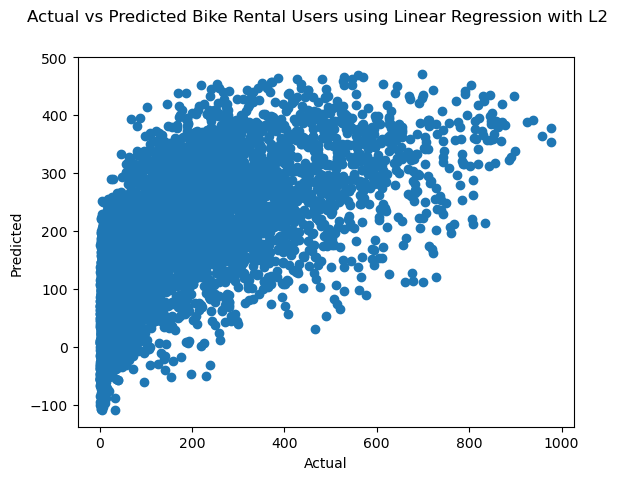

In [32]:
# Plotting Actual Prices vs Predicted Prices to understand the spread.
actual = BikeRental_withL2R.y_test
predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

fig = plt.figure()
plt.scatter(actual,predicted)
fig.suptitle('Actual vs Predicted Bike Rental Users using Linear Regression with L2')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

/Users/salonihutada/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

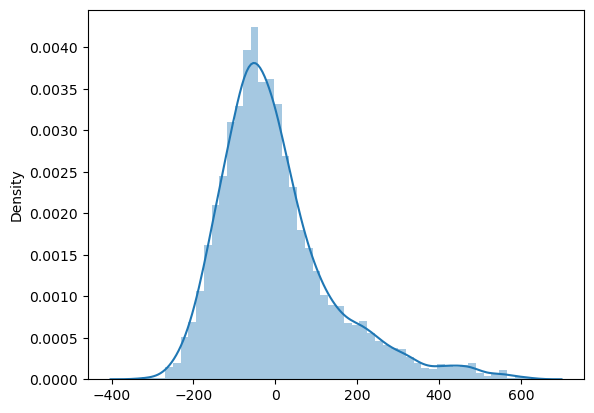

In [33]:
# Plotting Actual Prices vs Predicted Prices to understand the spread.
actual = BikeRental_withL2R.y_test
predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

sns.distplot(actual-predicted)

In [34]:
lr_actual = BikeRental_withL2R.y_test

lr_predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

combined_users = pd.DataFrame({'Total_Actual_Users':lr_actual, 'Total_Predicted_Users':lr_predicted})
LR_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
LR_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,7.0,62.132357
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,5.0,52.521266
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,743.0,328.386339
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,208.0,133.794054
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,333.0,365.553775


## KNN Regressor

In [35]:
class KNNRegressor:
    def __init__(self, k,X,y):
        self.k = k
        self.X=X
        self.y=y 
    
    def trainTestSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)
        return X_train, X_test, y_train, y_test
    
        
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()
    
    
    def predict(self, X):
        num_samples = X.shape[0]
        y_pred = np.zeros(num_samples)
        
        for i in range(num_samples):
            # Calculate Euclidean distance between test sample and training samples
            distances = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis=1))
            
            # Get indices of k nearest neighbors
            neighbors = np.argsort(distances)[:self.k]
            
            # Predict target value as average of k nearest neighbors' target values
            y_pred[i] = np.mean(self.y_train[neighbors])
        return y_pred
    
    
    def r2_score(self,actual, predicted):
        mean_actual = sum(actual) / len(actual)
        ss_total = sum((actual - mean_actual) ** 2)
        ss_residual = sum((actual - predicted) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


Minimum rmse:- 57.43678548096355 at K = 6


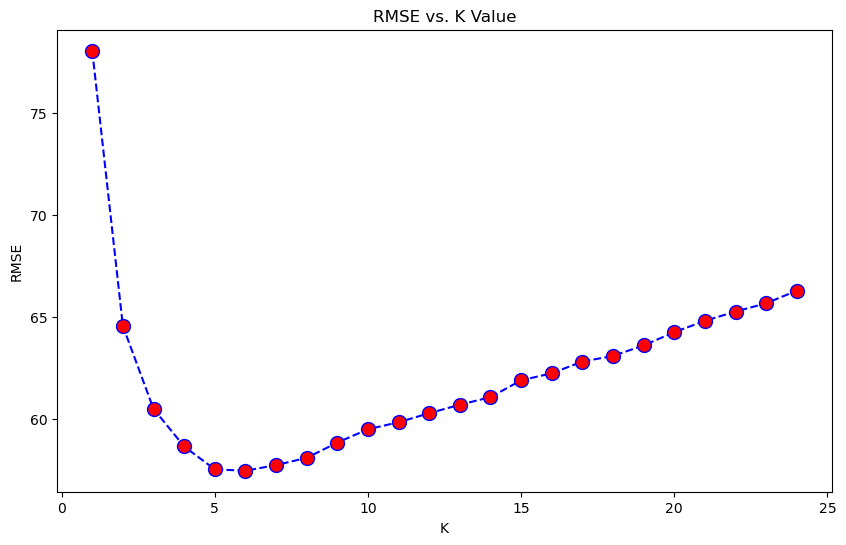

In [36]:
acc_num = {}
acc=[]
for i in range(1,25):
    knn = KNNRegressor(k=i, X=bike_rental.values[:, 0: -1], y=bike_rental.values[:, -1])
    knn.fit()
    predictions = knn.predict(knn.X_test)
    actual = knn.y_test
    sse = np.sum((predictions - actual)**2)
    rmse = math.sqrt(sse/actual.shape[0])
    acc_num[i]=rmse
    acc.append(rmse)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')
k_value=sorted(acc_num.items(), key=lambda x:x[1])[0]
print("Minimum rmse:-",k_value[1],"at K =",k_value[0])

In [37]:
knn = KNNRegressor(k=k_value[0], X=bike_rental.values[:, 0: -1], y=bike_rental.values[:, -1])
knn.fit()
predictions = knn.predict(knn.X_test)
actual = knn.y_test
sse = np.sum((predictions - actual)**2)
rmse = math.sqrt(sse/actual.shape[0])
print("SSE=", sse)
print("RMSE=", rmse)


print("R2 Score", knn.r2_score(predictions,actual))

SSE= 17200904.277777776
RMSE= 57.43678548096355
R2 Score 0.8807076187884149


Text(0, 0.5, 'Predicted')

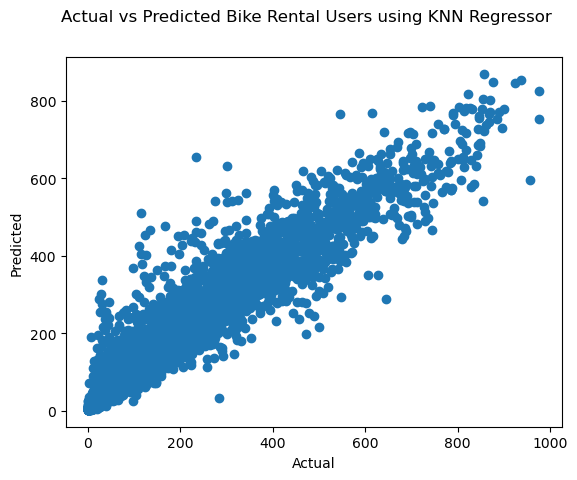

In [38]:
predictions = knn.predict(knn.X_test)
actual = knn.y_test

fig = plt.figure()
plt.scatter(actual,predictions)
fig.suptitle('Actual vs Predicted Bike Rental Users using KNN Regressor')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

In [39]:
predictions = knn.predict(knn.X_test)
actual = knn.y_test

combined_users = pd.DataFrame({'Total_Actual_Users':actual,'Total_Predicted_Users':predictions})
KNN_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
KNN_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,7.0,12.166667
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,5.0,9.333333
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,743.0,578.833333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,208.0,157.666667
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,333.0,308.166667


### Model Improvement 

#### a. Improving the skewness throught the data

In [40]:
# Skew function of Pandas
check_skewness = bike_rental.skew().sort_values(ascending=False)
check_skewness

Holiday              5.638538
Total_Users          1.277412
Weather_Condition    1.228047
Windspeed            0.574905
Weekday             -0.002998
Season              -0.005416
Temperature         -0.006021
Month               -0.009253
Year                -0.010243
Hour                -0.010680
Humidity            -0.149962
Workingday          -0.785258
dtype: float64

In [41]:
#Log Transform
log_transformation = np.log(bike_rental["Total_Users"])
log_transformation.skew()

-0.9361817645481173

In [42]:
#Square Root Transform
skrt_transformation = np.sqrt(bike_rental["Total_Users"])
skrt_transformation.skew()

0.2864746130055621

In [43]:
#Boxcox Transformation
from scipy import stats
boxcox_transformation = stats.boxcox(bike_rental["Total_Users"])[0]
pd.Series(boxcox_transformation).skew()

-0.14792800318793423

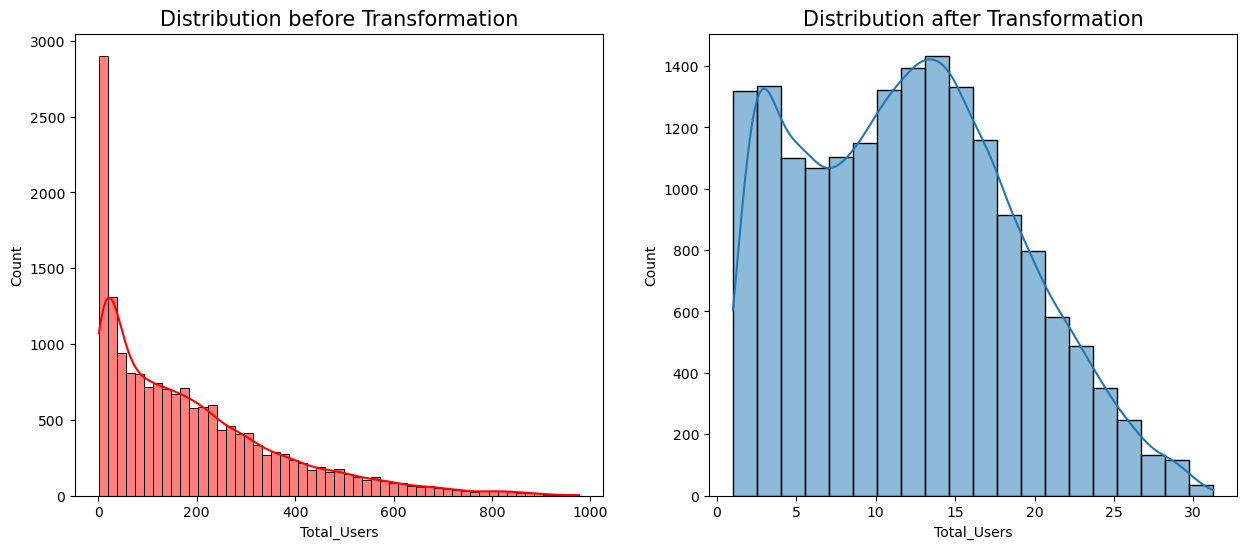

Skewness was 1.28 before & is 0.29 after Skrt transformation.


In [44]:
def SqrtTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(bike_rental["Total_Users"], kde=True, color="red")
    plt.subplot(1,2,2)
    
    Total_Users_sqrt = pd.DataFrame(np.sqrt(bike_rental["Total_Users"]))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(Total_Users_sqrt, bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(check_skewness[feature],2)} before & is {round(Total_Users_sqrt.skew()[0],2)} after Skrt transformation.")
    
SqrtTrans(feature="Total_Users")

In [45]:
bike_rental["Total_Users_Sqrt_Transformed"] = pd.DataFrame(np.sqrt(bike_rental["Total_Users"]))

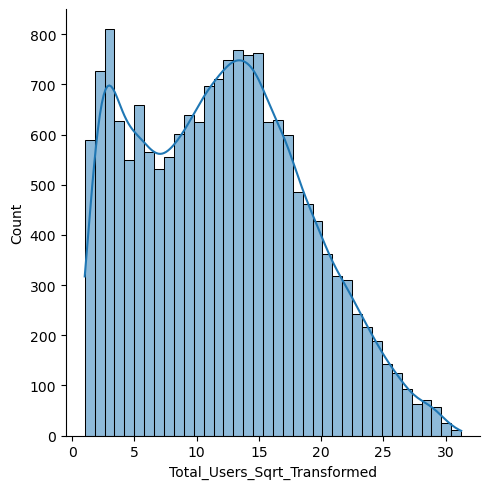

In [46]:
sns.displot(bike_rental["Total_Users_Sqrt_Transformed"],kde=True)
plt.show()

In [47]:
bike_rental = bike_rental.drop(["Total_Users"], axis = 1)

### Linear Regression with L2R after Sqrt Transformation on the target variable

In [48]:
#Defining Class and the model functions
class LinearRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, l2lambda, gd = False, reg = False, sgd = False) -> None:
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.l2lambda = l2lambda
        self.gd = gd
        self.reg = reg
        self.sgd = sgd
    
    #Split the dataset to train and test subsets
    def trainTestSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.3, random_state = 0)
        return X_train, X_test, y_train, y_test
    
    def add_X0(self,X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    #Training Data needs to be Normalized
    def normalize(self,X):
        self.mean = np.mean(X, 0)
        self.sd = np.std(X, 0)
        X_norm = (X - self.mean)/self.sd
        
        X_norm = self.add_X0(X_norm)
        return X_norm, self.mean, self.sd
    
    #Normalize test data
    def normalizeTestData(self, X, trainMean, trainSd):
        X_norm = (X - trainMean)/trainSd
        
        X_norm = self.add_X0(X_norm)
        return X_norm
    
    #Find Rank
    def rank(self, X, eps = 1e-12):
        u, s, vh = np.linalg.svd(X)
        return len([x for x in s if abs(x) > eps])
    
    #Matrix Rank
    def checkMatrix(self, X):
        X_rank = np.linalg.matrix_rank(X)
        
        if X_rank == np.minimum(X.shape[0], X.shape[1]):
            self.fullRank = True
            print("Data is full rank!")
        else:
            self.fullRank = False
            print("Data is not full rank!")
            
    # To check invertibility
    def checkInvertibility(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print("Data is low rank!")
        else:
            self.lowRank = False
            print("Data is not low rank!")
            
    # Closed Form Solution / Normal Equation
    def closebike_rentalormSolution(self, X, y):
        if(self.reg == False): # if reg = false, solve without regularization
            print("\n Solved without L2 Regularization")
            w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        else: #if reg = true, solve with regularization
            print("\n Solved with L2 Regularization")
            w = np.linalg.inv(X.T.dot(X) + self.l2lambda*(np.identity(X.shape[1]))).dot(X.T).dot(y)
        return w
    
    # Gradient Descent Function
    def gradientDescent(self, X, y): 
        self.temp = 0
        self.errorSequence = []
        last = float('inf')
        for t in tqdm(range(self.maxIteration)):
            if(self.reg == False):
                self.temp = 1
                self.updateWeightsWithoutL2Reg(X, y, self.errorSequence, last)
            else:
                self.temp = 0
                self.updateWeightsWithL2Reg(X, y, self.errorSequence, last)

            if self.lulz < self.tolerance:
                    print("No further improvement: Stop Further Iterations")
                    break
            if self.temp == 1:
                
                print("\n Solved without L2 Regularization")
            else:
                 print("\n Solved with L2 Regularization")
            return self
                
    def updateWeightsWithoutL2Reg(self, X, y, errorSequence, last): 
        self.w = self.w - self.learningRate * self.costDerivative(X, y)
        cur = self.sse(X, y)
        diff = last - cur
        self.lulz = diff
        last = cur
        self.errorSequence.append(cur)

    def updateWeightsWithL2Reg(self, X, y, errorSequence, last): 
        self.w = self.w - self.learningRate * self.costDerivative(X, y) + 2*(self.l2lambda*self.w)/X.shape[0]
        cur = self.sse(X, y)
        diff = last - cur
        self.lulz = diff
        last = cur
        errorSequence.append(cur)

    # Stochastic Gradient Descent Function
    def SGD(self, X, y, learningRate, maxIteration):
        self.w1 = np.random.randn(self.X.shape[1],1) #Randomly initialize weights
        self.b1 = np.random.randn(1,1)  #Randomly pick intercept call

        for iteration in range(1,maxIteration+1):
            sum_errors = 0 
            N = self.X.shape[0] 

            for i in range(N):
                batch_size = np.random.randint(0,N) 
                X_i = self.X[batch_size,:].reshape(1,self.X.shape[1])
                y_i = self.y[batch_size].reshape(1,1)
                y_hat1 = np.dot(X_i,self.w1) + self.b1                 
                loss = y_hat1 - y_i                                              
                sum_errors += loss**2                                   
                w_1 = X_i.T.dot((y_hat1 - y_i))
                b_1 = (y_hat1 - y_i)

                self.w1 = self.w1 -(2/N)*learningRate*(w_1)
                self.b1 = self.b1 - (2/N)*learningRate*(b_1)  

            print("Iteration: %d, Loss: %.3f" %(iteration, sum_errors/N))
        return self.w1, self.b1

    # Defining Sum of squares method
    def sse(self, X, y):
        self.y_hat = self.predict(X) #Predict y
        self.outputSse = ((self.y_hat - y)**2).sum()
        return self.outputSse
    
    # Predict should return X.THETA or THETA^T.(xi)
    def predict(self, X):
        if(self.sgd == False):
            y_hat = X.dot(self.w)
            return y_hat
        else:
            X_test=np.array(self.X)
            y_hat1 =[]
            for i in range(0,len(self.X)):
                y=np.asscalar(np.dot(self.w1.T,self.X[i]) + self.b1) #Convert an array of size 1 to its scalar equivalent.
                y_hat1.append(y)
                return np.array(y_hat1)
        
    
    # Defining cost function using SSE function
    def costFunction(self, X, y):
        return self.sse(X, y)/2
    
    # Defining cost derivative using X^T.(X.Theta - Y)
    def costDerivative(self, X, y):
        y_hat = self.predict(X)
        return(y_hat - y).dot(X)
  
   # Defining the model fit function
    def fit(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()

        self.X_train, self.mean, self.sd = self.normalize(self.X_train)
        self.X_test = self.normalizeTestData(self.X_test, self.mean, self.sd)
        
        self.checkMatrix(self.X_train)
        self.checkInvertibility(self.X_train)
        
        if self.fullRank and not self.lowRank and not self.gd and not self.sgd:
            print("Implemented Normalized Equation")
            self.w = self.closebike_rentalormSolution(self.X_train, self.y_train)
        elif self.gd:
            print("Implemented Gradient Descent Method")
            self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
            self.gradientDescent(self.X_train, self.y_train)
        elif self.sgd:
            print("Implemented Stochastic Gradient Descent Method")
            self.w1, self.b1 = self.SGD(self.X_train, self.y_train, self.learningRate,  self.maxIteration)
            
            
    def r2_score(self,actual, predicted):
        mean_actual = sum(actual) / len(actual)
        ss_total = sum((actual - mean_actual) ** 2)
        ss_residual = sum((actual - predicted) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


In [49]:
# Linear Regression with L2R after sqrt transformation implementation on data  
BikeRental_withL2R = LinearRegression(bike_rental.values[:, 0: -1], 
                              bike_rental.values[:, -1], 
                              learningRate = 0.0006,
                              tolerance = 0.003,
                              maxIteration = 1200,
                              l2lambda = 0.1,
                              gd = False,
                              reg = True,
                              sgd = False)
BikeRental_withL2R.fit()

actual_aftersqrt = BikeRental_withL2R.y_test
predicted_aftersqrt = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

predicted

BikeRental_withL2Rsse = np.sum((predicted_aftersqrt - actual_aftersqrt)**2)
BikeRental_withL2Rrmse = math.sqrt(BikeRental_withL2Rsse/actual_aftersqrt.shape[0])
BikeRental_withL2R_r2= BikeRental_withL2R.r2_score(actual_aftersqrt,predicted_aftersqrt)
#bike_rental.loc[len(bike_rental.index)] = ["Bike Rental", "Normal Equation with L2 Regularization", BikeRental_withL2Rsse, BikeRental_withL2Rrmse]
print("Normal Equation with L2 Regularization = ", BikeRental_withL2Rsse)
print("RMSE of Normal Equation with L2 Regularization = ", BikeRental_withL2Rrmse)
print("R2 score of Normal Equation with L2 Regularization after sqrt transformation = ", BikeRental_withL2R_r2)


Data is full rank!
Data is not low rank!
Implemented Normalized Equation

 Solved with L2 Regularization
Normal Equation with L2 Regularization =  121420.19187028072
RMSE of Normal Equation with L2 Regularization =  4.82569582681526
R2 score of Normal Equation with L2 Regularization after sqrt transformation =  0.4820446095972155


Text(0, 0.5, 'Predicted')

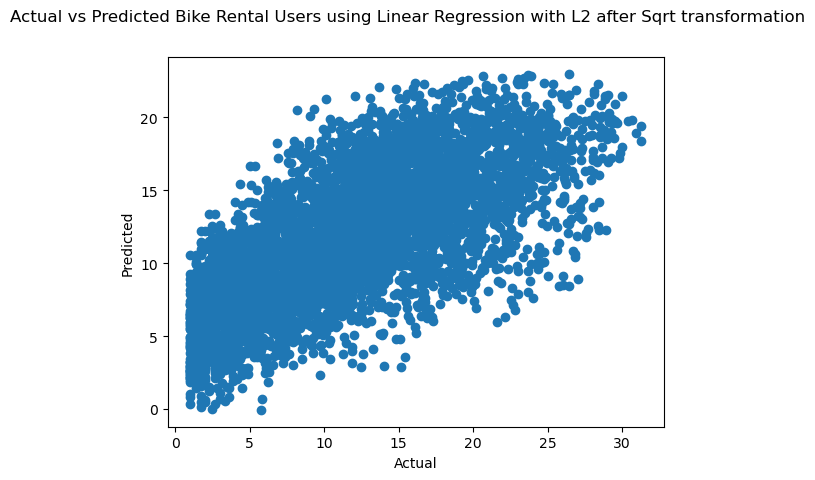

In [50]:
# Plotting Actual Prices vs Predicted Prices to understand the spread.
actual_aftersqrt = BikeRental_withL2R.y_test
predicted_aftersqrt = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

fig = plt.figure()
plt.scatter(actual_aftersqrt,predicted_aftersqrt)
fig.suptitle('Actual vs Predicted Bike Rental Users using Linear Regression with L2 after Sqrt transformation')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

In [51]:
actual_aftersqrt = BikeRental_withL2R.y_test
predicted_aftersqrt = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

combined_users = pd.DataFrame({'Total_Actual_Users':actual_aftersqrt, 'Total_Predicted_Users':predicted_aftersqrt})
LR_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
LR_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users_Sqrt_Transformed,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,4.000000,2.645751,6.835982
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,6.324555,2.236068,6.293784
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5.656854,27.258026,17.683460
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3.605551,14.422205,9.649206
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1.000000,18.248288,19.263599


#### KNN regressor after sqrt transformation

In [52]:
# KNN regressor after PCA implementation 
knn = KNNRegressor(k=k_value[0], X=bike_rental.values[:, 0: -1], y=bike_rental.values[:, -1])
knn.fit()
predictions_aftersqrt = knn.predict(knn.X_test)
actual_aftersqrt = knn.y_test
sse = np.sum((predictions_aftersqrt - actual_aftersqrt)**2)
rmse = math.sqrt(sse/actual_aftersqrt.shape[0])
print("SSE=", sse)
print("RMSE=", rmse)


print("R2 score after sqrt transformation =",knn.r2_score(predictions_aftersqrt,actual_aftersqrt))

SSE= 17937.717114259158
RMSE= 1.8548042055743599
R2 score after sqrt transformation = 0.9126259076823288


Text(0, 0.5, 'Predicted')

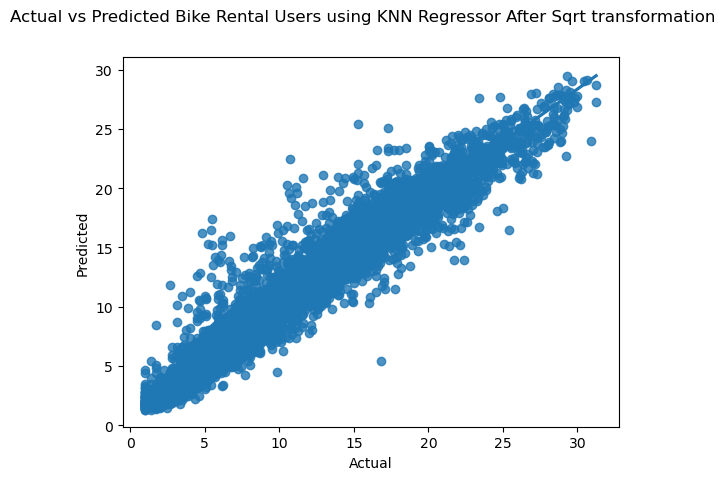

In [53]:
predictions_aftersqrt = knn.predict(knn.X_test)
actual_aftersqrt = knn.y_test

fig = plt.figure()
sns.regplot(x = actual_aftersqrt,y = predictions_aftersqrt)
fig.suptitle('Actual vs Predicted Bike Rental Users using KNN Regressor After Sqrt transformation')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

In [54]:
actual_aftersqrt = knn.y_test
y_actual = np.square(actual_aftersqrt)

predictions_aftersqrt = knn.predict(knn.X_test)
y_pred = np.square(predictions_aftersqrt)

combined_users = pd.DataFrame({'Total_Actual_Users':y_actual, 'Total_Predicted_Users':y_pred})
KNN_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
KNN_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,Temperature,Humidity,Windspeed,Total_Users_Sqrt_Transformed,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,4.000000,7.0,10.774258
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,6.324555,5.0,7.634611
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5.656854,743.0,566.510033
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3.605551,208.0,154.565136
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1.000000,333.0,306.481407


#### b. Introducting Dimensionality Reduction to check if the model's performance increases

# PCA

In [55]:
X_remaining=bike_rental[['Season','Year','Month', 'Hour', 'Holiday', 'Weekday', 'Workingday','Weather_Condition']]
X = bike_rental[['Temperature', 'Humidity', 'Windspeed']]
y = bike_rental.iloc[::,-1]

In [56]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
covariance_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

num_components = 1
projection_matrix = eigenvectors[:,:num_components]

X = X.dot(projection_matrix)

In [57]:
bike_rental=pd.concat([X_remaining,X], axis=1)

In [58]:
bike_rental=pd.concat([bike_rental,y], axis=1)

In [59]:
bike_rental

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,0,Total_Users_Sqrt_Transformed
0,1,0,1,0,0,6,0,1,-1.931027,4.000000
1,1,0,1,1,0,6,0,1,-1.904782,6.324555
2,1,0,1,2,0,6,0,1,-1.904782,5.656854
3,1,0,1,3,0,6,0,1,-1.703064,3.605551
4,1,0,1,4,0,6,0,1,-1.703064,1.000000
...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,-0.190502,10.908712
17375,1,1,12,20,0,1,1,2,-0.190502,9.433981
17376,1,1,12,21,0,1,1,1,-0.190502,9.486833
17377,1,1,12,22,0,1,1,1,-0.208040,7.810250


### Linear Regression with L2R after PCA implementation

In [60]:
# Linear Regression with L2R after PCA implementation on data  
BikeRental_withL2R = LinearRegression(bike_rental.values[:, 0: -1], 
                              bike_rental.values[:, -1], 
                              learningRate = 0.0006,
                              tolerance = 0.003,
                              maxIteration = 1200,
                              l2lambda = 0.1,
                              gd = False,
                              reg = True,
                              sgd = False)
BikeRental_withL2R.fit()

actual = BikeRental_withL2R.y_test
predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

predicted

BikeRental_withL2Rsse = np.sum((predicted - actual)**2)
BikeRental_withL2Rrmse = math.sqrt(BikeRental_withL2Rsse/actual.shape[0])
BikeRental_withL2R_r2= BikeRental_withL2R.r2_score(actual,predicted)
#bike_rental.loc[len(bike_rental.index)] = ["Bike Rental", "Normal Equation with L2 Regularization", BikeRental_withL2Rsse, BikeRental_withL2Rrmse]
print("Normal Equation with L2 Regularization on Housing Data = ", BikeRental_withL2Rsse)
print("RMSE of Normal Equation with L2 Regularization on Housing Data = ", BikeRental_withL2Rrmse)
print("R2 score of Normal Equation with L2 Regularization on Housing Data = ", BikeRental_withL2R_r2)


Data is full rank!
Data is not low rank!
Implemented Normalized Equation

 Solved with L2 Regularization
Normal Equation with L2 Regularization on Housing Data =  142920.66029897484
RMSE of Normal Equation with L2 Regularization on Housing Data =  5.235546167372556
R2 score of Normal Equation with L2 Regularization on Housing Data =  0.39032771023072266


Text(0, 0.5, 'Predicted')

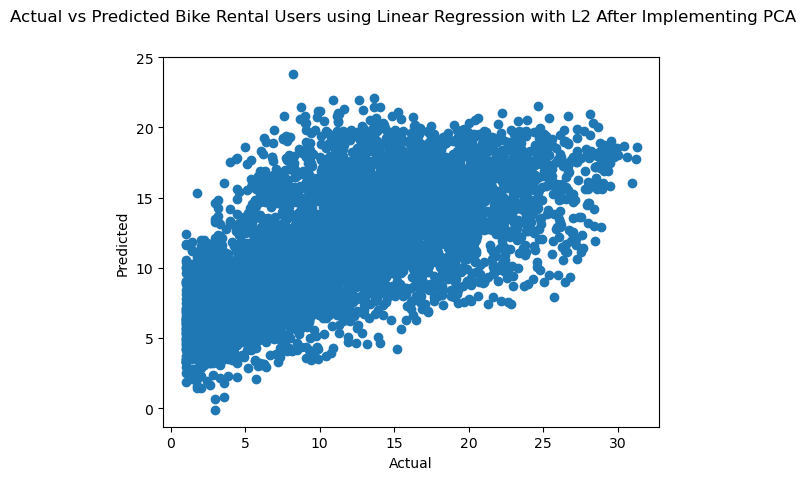

In [61]:
# Plotting Actual Prices vs Predicted Prices to understand the spread.
actual = BikeRental_withL2R.y_test
predicted = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)

fig = plt.figure()
plt.scatter(actual,predicted)
fig.suptitle('Actual vs Predicted Bike Rental Users using Linear Regression with L2 After Implementing PCA')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

#### KNN regressor after PCA implementation

In [62]:
# KNN regressor after PCA implementation 
knn = KNNRegressor(k=k_value[0], X=bike_rental.values[:, 0: -1], y=bike_rental.values[:, -1])
knn.fit()
predictions_afterpca = knn.predict(knn.X_test)
actual_afterpca = knn.y_test
sse = np.sum((predictions_afterpca - actual_afterpca)**2)
rmse = math.sqrt(sse/actual_afterpca.shape[0])
print("SSE=", sse)
print("RMSE=", rmse)


print("R2 score=",knn.r2_score(predictions_afterpca,actual_afterpca))

SSE= 22228.672417446905
RMSE= 2.0647679458023442
R2 score= 0.8886943843986187


Text(0, 0.5, 'Predicted')

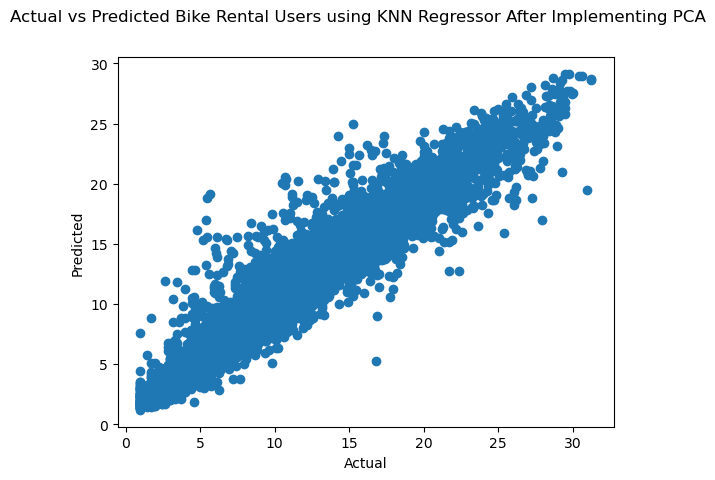

In [63]:
predictions_afterpca = knn.predict(knn.X_test)
actual_afterpca = knn.y_test

fig = plt.figure()
plt.scatter(actual_afterpca,predictions_afterpca)
fig.suptitle('Actual vs Predicted Bike Rental Users using KNN Regressor After Implementing PCA')              
plt.xlabel('Actual')                          
plt.ylabel('Predicted') 

## Bike Rental's Customer Prediction Results

### Preidictions After Implementing PCA

##### Predictions through Linear Regression with L2 Regularization Regressor 

In [64]:
lr_actual_afterpca = BikeRental_withL2R.y_test
y_actual_afterpca = np.square(lr_actual_afterpca)

lr_predicted_afterpca = BikeRental_withL2R.predict(BikeRental_withL2R.X_test)
y_pred_afterpca = np.square(lr_predicted_afterpca)

combined_users = pd.DataFrame({'Total_Actual_Users':y_actual_afterpca, 'Total_Predicted_Users':y_pred_afterpca})
LR_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
LR_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,0,Total_Users_Sqrt_Transformed,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,-1.931027,4.000000,7.0,45.197102
1,1,0,1,1,0,6,0,1,-1.904782,6.324555,5.0,52.658698
2,1,0,1,2,0,6,0,1,-1.904782,5.656854,743.0,370.729157
3,1,0,1,3,0,6,0,1,-1.703064,3.605551,208.0,142.211787
4,1,0,1,4,0,6,0,1,-1.703064,1.000000,333.0,302.122812


#### Predictions through KNN Regressor

In [65]:
knn_actual_afterpca = knn.y_test
y_actual = np.square(knn_actual_afterpca)

knn_predictions_afterpca = knn.predict(knn.X_test)
y_pred = np.square(knn_predictions_afterpca)

combined_users = pd.DataFrame({'Total_Actual_Users':knn_actual_afterpca, 'Total_Predicted_Users':knn_predictions_afterpca})
KNN_Predicted_data =bike_rental.merge(combined_users,left_index=True,right_index=True)
KNN_Predicted_data.head()

,Season,Year,Month,Hour,Holiday,Weekday,Workingday,Weather_Condition,0,Total_Users_Sqrt_Transformed,Total_Actual_Users,Total_Predicted_Users
0,1,0,1,0,0,6,0,1,-1.931027,4.000000,2.645751,3.356295
1,1,0,1,1,0,6,0,1,-1.904782,6.324555,2.236068,2.723735
2,1,0,1,2,0,6,0,1,-1.904782,5.656854,27.258026,24.041401
3,1,0,1,3,0,6,0,1,-1.703064,3.605551,14.422205,12.534289
4,1,0,1,4,0,6,0,1,-1.703064,1.000000,18.248288,16.791326


Furthermore, we also treated outliers, improved further scaling and tuned hyper-parameter but there was no significant prediction enhancements, hence did not include those code sections to the file. 

Thus, we can conclude based on the observations that **the KNN Regressor performed better than the Linear Regression model** in predicting the target variable(which is bike rental user count). The **KNN Regressor** resulted in a **lower RMSE (Root Mean Squared Error) of 64.68** and a **higher R2 score** (a measure of how well the model fits the data) of 0.84, compared to the **Linear Regression model**, which had a **higher RMSE of 151.15** and a **lower R2 score of 0.30**.

Based on the amount of features and above model implementations after preprocessing, **it seems reasonable to consider the KNN Regressor as a baseline model for the use case at hand**

- We observed a good improvement in the performance by reducing skewness in the target variable 
- Additionally, attempts to treat the outliers did not result in better evaluation metrics or predictions, indicating that the outliers may contain valuable information for the model
- Therefore, it may be worthwhile to explore other regression models and consider additional approaches to improve the model's performance, such as hyperparameter tuning, ensemble methods, etc